In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [2]:
active_sigs = np.load('../fig3/tss/temp/HepG2_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()
silence_sigs = np.load('../fig3/represses/tss/temp/HepG2_H3K9me3_H3K27me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()


In [3]:
all_active_sig, all_silence_sig = set(), set()
for chr in range(1, 23):
    for active_sig in active_sigs[chr]:
        all_active_sig.add((active_sig[0], active_sig[1], chr))
    for silence_sig in silence_sigs[chr]:
        all_silence_sig.add((silence_sig[0], silence_sig[1], chr))

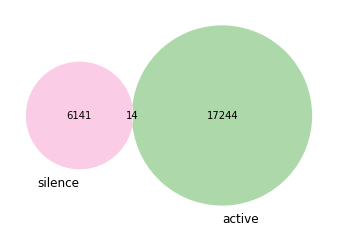

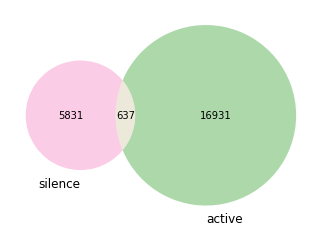

In [4]:
def show_venn(all_active_sig, all_silence_sig):
    venn2(subsets = [all_silence_sig, all_active_sig], set_labels = ('silence', 'active'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
    plt.show()
show_venn(all_active_sig, all_silence_sig)

_all_active_sig = all_active_sig.copy()
_all_silence_sig = set()
for _silence_sig in all_silence_sig:
    flag = False
    for _active_sig in _all_active_sig:
        if abs(_silence_sig[0]-_active_sig[0])<3 and abs(_silence_sig[1]-_active_sig[1])<3:
            _all_silence_sig.add(_active_sig)
            flag = True
    _all_silence_sig.add(_silence_sig)
    if flag:
        _all_active_sig.add(_silence_sig)

show_venn(_all_active_sig, _all_silence_sig)

In [5]:
active_sigs = _all_active_sig - _all_silence_sig
silence_sigs = _all_silence_sig - _all_active_sig

In [6]:
TAD_file_path = '/data1/lmh_data/MINE/GM12878_ATAC_H3K27ac_H3K4me3/analyse/HepG2_ATAC_H3K27ac_H3K4me3/experiment/HiCDB/txt/CDB.txt'
TADS = dict()
with open(TAD_file_path, "r") as f:
    datas = f.readlines()
    for data in datas:
        data = data.split()
        if int(data[5]) != 1:
            continue
        chr = int(data[0])
        bin1, bin2 = int(int(data[1])/1000), int(int(data[2])/1000)
        bin = int((bin1 + bin2) / 2)
        if chr not in TADS.keys():
            TADS[chr] = set()
        TADS[chr].add(bin)
        
for chr in TADS.keys():
    _list = list(TADS[chr])
    _list.sort()
    TADS[chr] = _list


In [7]:
results = dict()
for chr in TADS.keys():
    for index in range(len(TADS[chr]) - 1):
        bin1, bin2 = TADS[chr][index], TADS[chr][index+1]

        actives, silences = 0, 0
        for sig in active_sigs:
            if sig[2] != chr:
                continue
            if (sig[0] < bin1 or sig[0] > bin2) or (sig[1] < bin1 or sig[1] > bin2):
                continue
            actives += 1
        for sig in silence_sigs:
            if sig[2] != chr:
                continue
            if (sig[0] < bin1 or sig[0] > bin2) or (sig[1] < bin1 or sig[1] > bin2):
                continue
            silences += 1
        if actives == 0 and silences == 0:
            continue
        if chr not in results.keys():
            results[chr] = set()
        results[chr].add((bin1, bin2, actives, silences))

In [8]:
for key in results.keys():
    print(results[key])

{(64760, 66110, 1, 0), (10760, 11200, 8, 0), (47710, 48640, 3, 0), (101410, 103560, 12, 0), (57940, 62200, 1, 0), (113180, 113430, 1, 0), (98400, 101410, 4, 0), (53050, 53510, 33, 0), (46360, 46680, 2, 0), (57190, 57250, 2, 0), (68850, 69830, 0, 1), (56760, 57000, 1, 2), (2050, 3040, 8, 0), (120320, 122970, 139, 0), (109390, 113100, 60, 0), (570, 1600, 3, 0), (57000, 57190, 19, 0), (52990, 53050, 3, 0), (130750, 130820, 7, 0), (55620, 56470, 20, 0), (42130, 43760, 1, 0), (69880, 70730, 4, 0), (6280, 9060, 88, 1), (51420, 52880, 8, 0), (26100, 27330, 1, 0), (64400, 64760, 1, 0), (76620, 82360, 3, 0), (3880, 4280, 8, 0), (34070, 38320, 28, 0), (89010, 89540, 3, 0), (123260, 124320, 10, 0), (68320, 68850, 8, 0), (12080, 12350, 3, 0), (22690, 25130, 1, 0), (48640, 50500, 46, 2), (124820, 130750, 4, 0), (66110, 67950, 1, 0), (12350, 12710, 4, 0), (9110, 10210, 11, 0), (50500, 50760, 19, 0), (91360, 93490, 1, 0), (108560, 109390, 12, 0), (53540, 53760, 12, 1), (94130, 94540, 1, 0), (95610, 9

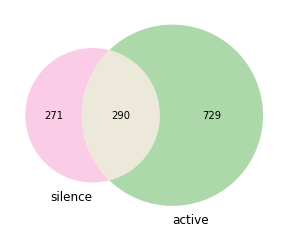

In [11]:
active_tads, silence_tads = set(), set()
for key in results.keys():
    for tad in results[key]:
        if tad[2] != 0:
            active_tads.add((key, tad[0], tad[1]))
        if tad[3] != 0:
            silence_tads.add((key, tad[0], tad[1]))
venn2(subsets = [silence_tads, active_tads], set_labels = ('silence', 'active'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
plt.show()

In [12]:
print(results[4])

{(84970, 86920, 1, 0), (37600, 38060, 1, 0), (40920, 41220, 1, 0), (139020, 140850, 31, 0), (67390, 68270, 1, 0), (145090, 145620, 10, 0), (165120, 165470, 21, 0), (10160, 10550, 1, 0), (150250, 151100, 2, 0), (20770, 22390, 3, 0), (169610, 170100, 3, 0), (27030, 37390, 3, 0), (120070, 122920, 1, 0), (112630, 113390, 2, 0), (184260, 185600, 24, 0), (89110, 94610, 7, 0), (83280, 83650, 2, 0), (68270, 69170, 27, 0), (152780, 153130, 1, 0), (16020, 16280, 1, 0), (10550, 13630, 0, 1), (77220, 77950, 3, 0), (22390, 24420, 1, 0), (38060, 40920, 51, 1), (113390, 113770, 1, 0), (125310, 127590, 1, 0), (145620, 147610, 2, 0), (147880, 150250, 1, 0), (74680, 77220, 16, 0), (86920, 88520, 21, 0), (17470, 20700, 14, 0), (77950, 78940, 2, 0), (73070, 73260, 17, 0), (183450, 184260, 7, 0), (15470, 15960, 2, 0), (55340, 57160, 16, 0), (24470, 27030, 11, 0), (70560, 73070, 2, 0), (98140, 99090, 3, 0), (78940, 81380, 1, 0), (127780, 139020, 17, 0), (158720, 159460, 5, 0), (170100, 176350, 6, 0), (15946

In [27]:
def cal_numbers(tads):
    chromosome = np.zeros(22)
    for tad in tads:
        chromosome[tad[0]-1] += 1
    chromosome /= len(tads)
    return chromosome

def show(silence_chromosome, active_chromosome):
    sns.set_style("whitegrid") 
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
    axes.grid(False)
    axes.plot(range(1, 23), active_chromosome, color=(51/255, 160/255, 44/255), label='active')
    axes.plot(range(1, 23), silence_chromosome, color=(177/255, 89/255, 40/255), label='silence')

    plt.xlabel('chromosome')
    plt.ylabel('nums')
    plt.legend(loc='lower right')
    plt.show()

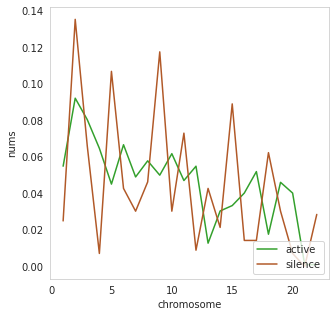

In [28]:
silence_chromosome = cal_numbers(silence_tads)
active_chromosome = cal_numbers(active_tads)
show(silence_chromosome, active_chromosome)

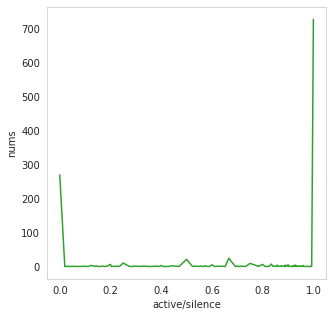

In [41]:
_propotion = list()
for key in results.keys():
    for tad in results[key]:
        active_number, silence_number = tad[2], tad[3]
        if active_number == 0:
            _propotion.append(0)
        elif silence_number == 0:
            _propotion.append(1)
        else:
            _propotion.append(active_number/(silence_number+active_number))

propotion = {}
for key in _propotion:
    propotion[key] = propotion.get(key, 0) + 1

keys = sorted(propotion.keys())
values = [propotion[key] for key in keys]
    
sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(list(keys), list(values), color=(51/255, 160/255, 44/255), label='active')

plt.xlabel('active/silence')
plt.ylabel('nums')
plt.show()

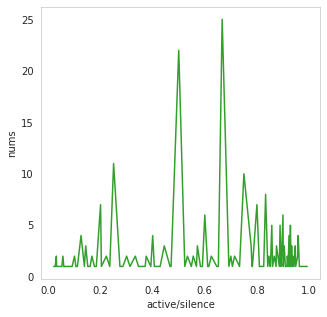

In [44]:
sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(list(keys)[1:-1], list(values)[1:-1], color=(51/255, 160/255, 44/255), label='active')

plt.xlabel('active/silence')
plt.ylabel('nums')
plt.show()